In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns

In [2]:
# import data
LR_data = pd.read_csv('LR Model Trained Data.csv')
NB_data = pd.read_csv('multinomialNB_model_training.csv')

# peek data
LR_data.head()

,ID,Tweet,Sentiment,Time,Age,Country,Population -2020,Land Area (KmÂ²),Density (P/KmÂ²),Ground Truth,Predictions,Match
0,d1d7ed938d,great site photos fantastic useful visit pemb...,positive,morning,46-60,Egypt,102334404,995450,103,happiness,['happiness'],True
1,be0a927a80,_n too want ooze speaking either why lame jok...,neutral,noon,60-70,Guinea-Bissau,1968001,28120,70,df,['df'],True
2,6b4eb2871c,thanks link ive voted ill send too,positive,noon,21-30,Bulgaria,6948445,108560,64,df,['df'],True
3,9c503adc87,also liptons sparkling green tea gross,neutral,noon,21-30,Somalia,15893222,627340,25,disgust,['disgust'],True
4,3e1f7acd3c,know lender was yea people definitely sucked b...,negative,night,70-100,Monaco,39242,1,26337,anger,['anger'],True


In [3]:
# find number of correctly matched

# LR
LR_match = LR_data.loc[LR_data['Match'] == True]
len_LR_match = len(LR_match)

# NB
NB_match = NB_data.loc[NB_data['Match'] == True]
len_NB_match = len(NB_match)

# view
print('LR number of correctly matched emotions: ', len_LR_match)
print('NB number of correctly matched emotions: ', len_NB_match)

LR number of correctly matched emotions:  706
NB number of correctly matched emotions:  608


In [4]:
# find number of incorrectly matched

# LR
LR_no_match = LR_data.loc[LR_data['Match'] == False]
len_LR_no_match = len(LR_no_match)

# NB
NB_no_match = NB_data.loc[NB_data['Match'] == False]
len_NB_no_match = len(NB_no_match)

# view
print('LR number of incorrectly matched emotions: ', len_LR_no_match)
print('NB number of incorrectly matched emotions: ', len_NB_no_match)

LR number of incorrectly matched emotions:  93
NB number of incorrectly matched emotions:  191


In [5]:
# find total number of predictions

# actual
total = len(LR_data['Predictions'])

# LR
LR_total = len_LR_match + len_LR_no_match

# NB
NB_total = len_NB_match + len_NB_no_match

# view
print('LR total number of predictions: ', LR_total)
print('NB total number of predictions: ', NB_total)

LR total number of predictions:  799
NB total number of predictions:  799


In [6]:
# find accuracy scores

# LR
LR_accuracy = round((len_LR_match / LR_total) * 100, 2)

# NB
NB_accuracy = round((len_NB_match / NB_total) * 100, 2)

# view
print('LR accuracy score:  {}%'.format(LR_accuracy))
print('NB accuracy score:  {}%'.format(NB_accuracy))

LR accuracy score:  88.36%
NB accuracy score:  76.1%


In [7]:
# find number of default fallback

# actual
fallback = (LR_data['Ground Truth'].values == "df").sum()

# LR
LR_fallback = (LR_data['Predictions'].values == "['df']").sum()

# NB
NB_fallback = (NB_data['Predictions'].values == "['df']").sum()

# view
print('LR number of default fallback emotions: ', LR_fallback)
print('NB number of default fallback emotions: ', NB_fallback)

LR number of default fallback emotions:  174
NB number of default fallback emotions:  132


In [8]:
# find fallback ratio

# actual
fallback_ratio = round((fallback / total) * 100, 2)

# LR
LR_fallback_ratio = round((LR_fallback / LR_total) * 100, 2)

# NB
NB_fallback_ratio = round((NB_fallback / NB_total) * 100, 2)

# view
print('LR percent of emotions going to default fallback: {}%'.format(LR_fallback_ratio))
print('NB percent of emotions going to default fallback: {}%'.format(NB_fallback_ratio))

LR percent of emotions going to default fallback: 21.78%
NB percent of emotions going to default fallback: 16.52%


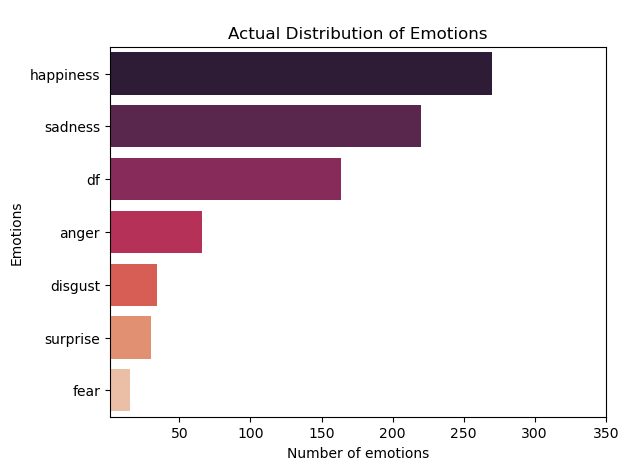

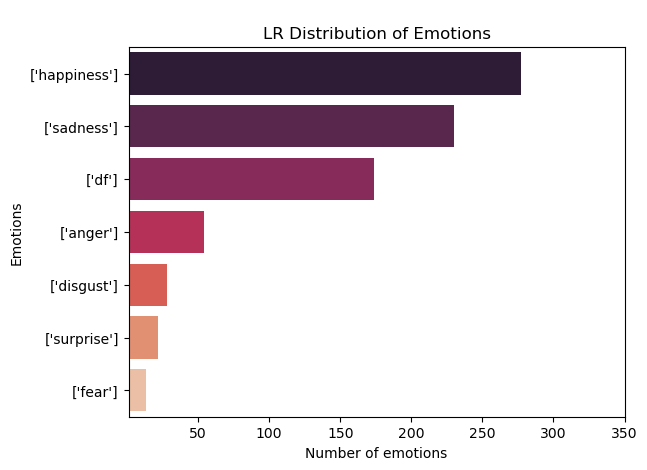

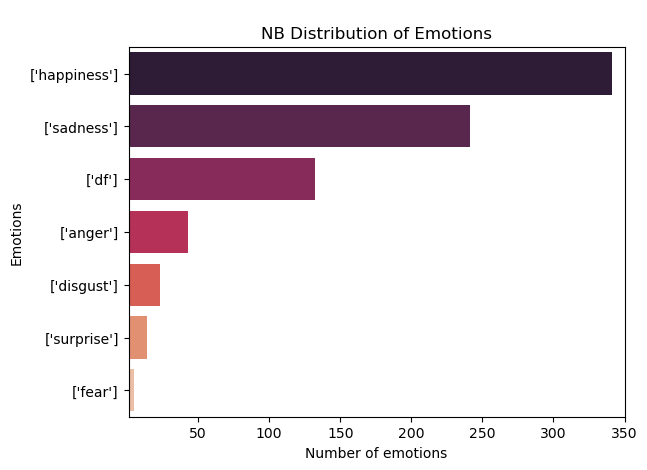

In [9]:
# visualization of emotion distribution

# actual
fig, ax = plt.subplots()
sns.countplot(y = LR_data['Ground Truth'], data = LR_data, palette = 'rocket', order = LR_data['Ground Truth'].value_counts().index)
plt.xlabel('Number of emotions')
plt.ylabel('Emotions')
plt.title('\nActual Distribution of Emotions')
ax.set_xlim(1, 350)
plt.show()

# LR
fig, ax = plt.subplots()
sns.countplot(y = LR_data['Predictions'], data = LR_data, palette = 'rocket', order = LR_data['Predictions'].value_counts().index)
plt.xlabel('Number of emotions')
plt.ylabel('Emotions')
plt.title('\nLR Distribution of Emotions')
ax.set_xlim(1, 350)
plt.show()

# NB
fig, ax = plt.subplots()
sns.countplot(y = NB_data['Predictions'], data = NB_data, palette = 'rocket', order = NB_data['Predictions'].value_counts().index)
plt.xlabel('Number of emotions')
plt.ylabel('Emotions')
plt.title('\nNB Distribution of Emotions')
ax.set_xlim(1, 350)
plt.show()

In [10]:
# create accuracy table
d = {'Perfect': [100], 'LR': [LR_accuracy], 'NB': [NB_accuracy]}
acc_table = pd.DataFrame(data = d)

# view
acc_table.head()

,Perfect,LR,NB
0,100,88.36,76.1


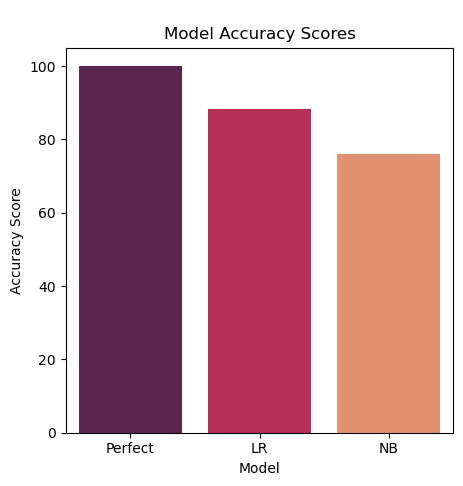

In [11]:
# visualize accuracies
plt.figure(figsize = (5, 5))
sns.barplot(data = acc_table, palette = 'rocket')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('\nModel Accuracy Scores')
plt.show()

In [12]:
# now lets look at the correlation between the emotion predicted by our most accurate model and some of the other columns in our data

In [13]:
# import full dataset
full_data = pd.read_csv('LR_full_predictions.csv')

# take sample of 10'000 so pc can run
data = full_data.sample(n = 10000)

# view
data.head(10)

,ID,Tweet,Sentiment,Time,Age,Country,Population -2020,Land Area (KmÃÂ²),Density (P/KmÃÂ²),Predictions
25222,628bab2c42,ive best buy target still electrik red album ...,negative,morning,46-60,Mali,20250833.0,1220190.0,17.0,['anger']
8541,708e67409c,_bhb went concert remember derek mark hosting ...,negative,noon,60-70,Saint Kitts and Nevis,53199.0,260.0,205.0,['df']
7084,df5c825929,work oh first day monthly visitor ahhhhhh,neutral,noon,21-30,Germany,83783942.0,348560.0,240.0,['sadness']
17334,700854e873,positive thinker sure keeping around,positive,noon,60-70,Azerbaijan,10139177.0,82658.0,123.0,['df']
18985,128a73fbfd,ill get size s now straight post office see la...,neutral,night,70-100,Marshall Islands,59190.0,180.0,329.0,['anger']
7916,eb7eb7b5d2,even bother getting new fonei break anywayfon...,negative,night,31-45,Tonga,105695.0,720.0,147.0,['happiness']
1987,346755a77b,happy birthday u happy birthday u happy birthd...,positive,morning,0-20,Nauru,10824.0,20.0,541.0,['happiness']
3183,c4848fbd98,im stuffed n cant move,neutral,morning,46-60,Central African Republic,4829767.0,622980.0,8.0,['sadness']
28232,2a815f151d,wants hang friends soon,positive,noon,21-30,Dominican Republic,10847910.0,48300.0,225.0,['sadness']
7075,259ab53f07,make good girls go bad,negative,noon,21-30,Fiji,896445.0,18270.0,49.0,['sadness']


In [14]:
# graph universal features
palette = sns.color_palette('rocket')

# group anger, fear, disgust, and surprise as 'other' due to size
for i in range(len(data)):
    if (data.iloc[i, 9] == "['anger']"):
        data.iloc[i, 9] = 'other'
    elif (data.iloc[i, 9] == "['fear']"):
        data.iloc[i, 9] = 'other'
    elif (data.iloc[i, 9] == "['disgust']"):
        data.iloc[i, 9] = 'other'
    elif (data.iloc[i, 9] == "['surprise']"):
        data.iloc[i, 9] = 'other'

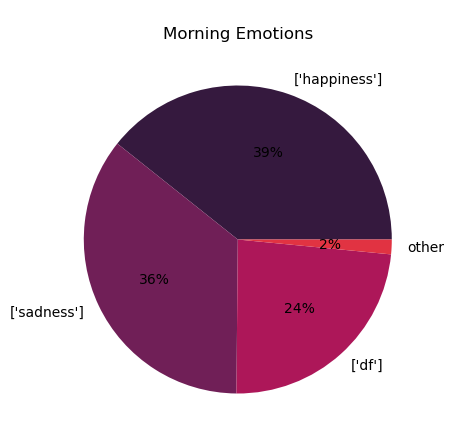

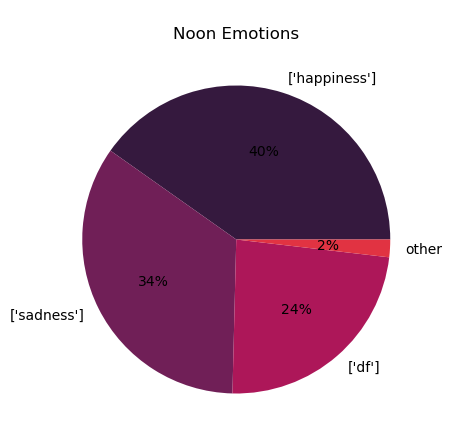

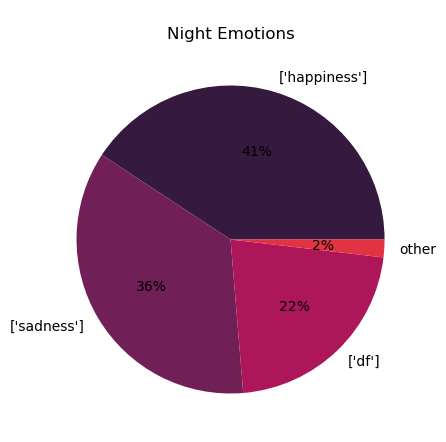

In [15]:
# relationship between emotion of tweets based on the time of day

# filter data
morning = data[data['Time'] == 'morning']
noon = data[data['Time'] == 'noon']
night = data[data['Time'] == 'night']

# find emotion counts
morning_count = morning['Predictions'].value_counts()
noon_count = noon['Predictions'].value_counts()
night_count = night['Predictions'].value_counts()

# morning chart
plt.figure(figsize = (5, 5))
plt.pie(morning_count, labels = morning_count.index, colors = palette, autopct='%.0f%%')
plt.title('\nMorning Emotions')
plt.show()

# noon chart
plt.figure(figsize = (5, 5))
plt.pie(noon_count, labels = noon_count.index, colors = palette, autopct='%.0f%%')
plt.title('\nNoon Emotions')
plt.show()

# night plot
plt.figure(figsize = (5, 5))
plt.pie(night_count, labels = night_count.index, colors = palette, autopct='%.0f%%')
plt.title('\nNight Emotions')
plt.show()

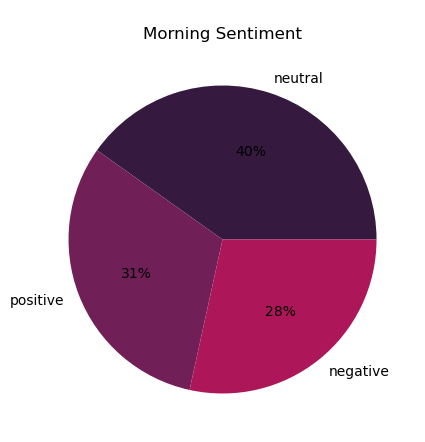

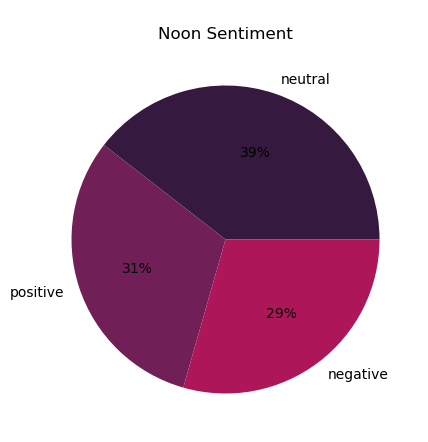

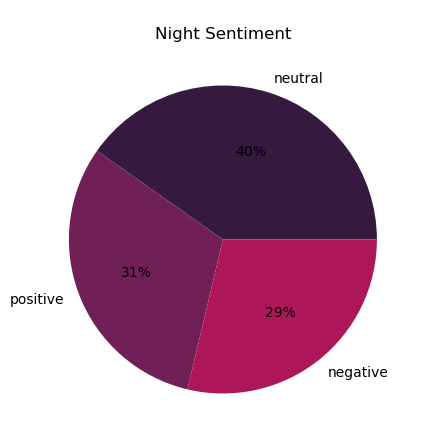

In [16]:
# relationship between sentiment of tweets based on the time of day

# filter data
morning = data[data['Time'] == 'morning']
noon = data[data['Time'] == 'noon']
night = data[data['Time'] == 'night']

# find emotion counts
morning_count = morning['Sentiment'].value_counts()
noon_count = noon['Sentiment'].value_counts()
night_count = night['Sentiment'].value_counts()

# morning chart
plt.figure(figsize = (5, 5))
plt.pie(morning_count, labels = morning_count.index, colors = palette, autopct='%.0f%%')
plt.title('\nMorning Sentiment')
plt.show()

# noon chart
plt.figure(figsize = (5, 5))
plt.pie(noon_count, labels = noon_count.index, colors = palette, autopct='%.0f%%')
plt.title('\nNoon Sentiment')
plt.show()

# night plot
plt.figure(figsize = (5, 5))
plt.pie(night_count, labels = night_count.index, colors = palette, autopct='%.0f%%')
plt.title('\nNight Sentiment')
plt.show()

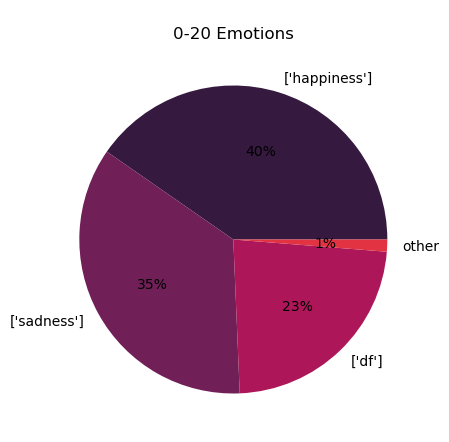

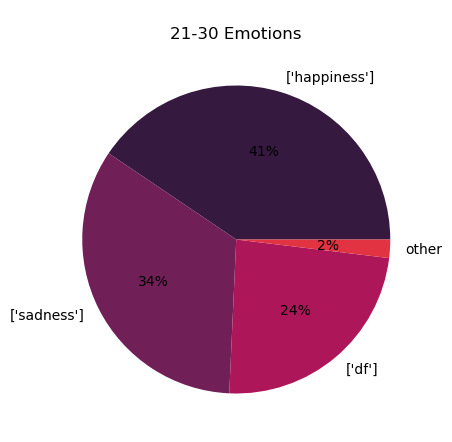

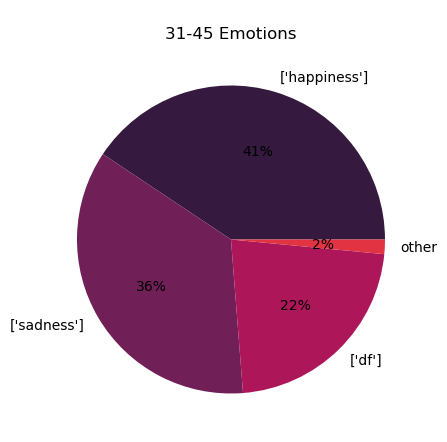

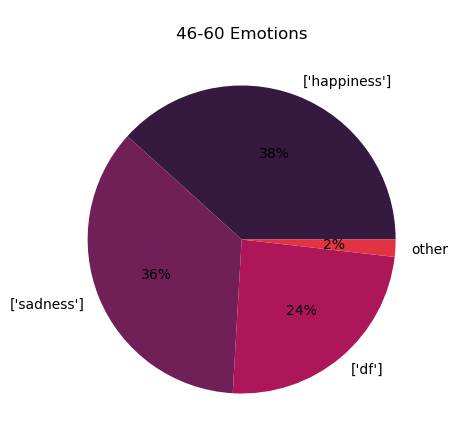

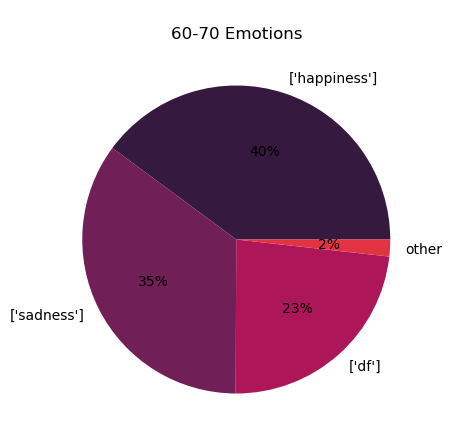

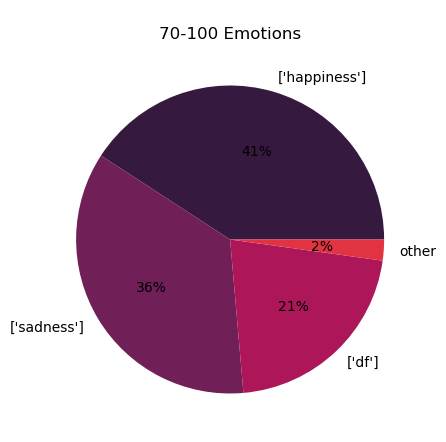

In [17]:
# relationship between emotion of tweets based user age.
        
# filter data
a1 = data[data['Age'] == '0-20']
a2 = data[data['Age'] == '21-30']
a3 = data[data['Age'] == '31-45']
a4 = data[data['Age'] == '46-60']
a5 = data[data['Age'] == '60-70']
a6 = data[data['Age'] == '70-100']

# find emotion counts
a1_count = a1['Predictions'].value_counts()
a2_count = a2['Predictions'].value_counts()
a3_count = a3['Predictions'].value_counts()
a4_count = a4['Predictions'].value_counts()
a5_count = a5['Predictions'].value_counts()
a6_count = a6['Predictions'].value_counts()

# 0-20 chart
plt.figure(figsize = (5, 5))
plt.pie(a1_count, labels = a1_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n0-20 Emotions')
plt.show()

# 21-30 chart
plt.figure(figsize = (5, 5))
plt.pie(a2_count, labels = a2_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n21-30 Emotions')
plt.show()

# 31-45 chart
plt.figure(figsize = (5, 5))
plt.pie(a3_count, labels = a3_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n31-45 Emotions')
plt.show()

# 46-60 chart
plt.figure(figsize = (5, 5))
plt.pie(a4_count, labels = a4_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n46-60 Emotions')
plt.show()

# 60-70 chart
plt.figure(figsize = (5, 5))
plt.pie(a5_count, labels = a5_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n60-70 Emotions')
plt.show()

# 70-100 chart
plt.figure(figsize = (5, 5))
plt.pie(a6_count, labels = a6_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n70-100 Emotions')
plt.show()


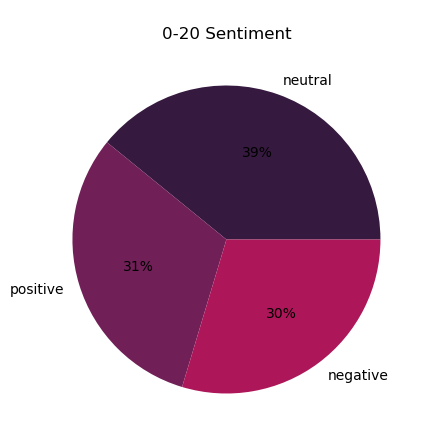

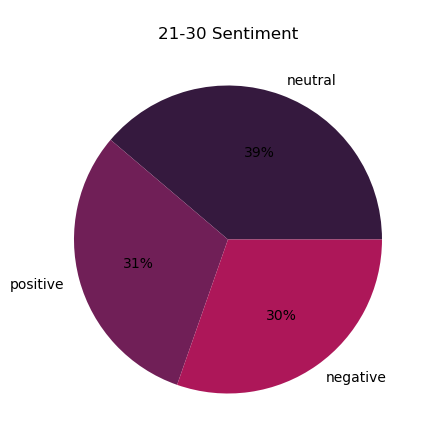

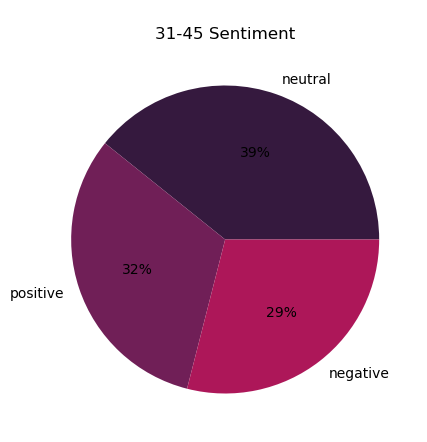

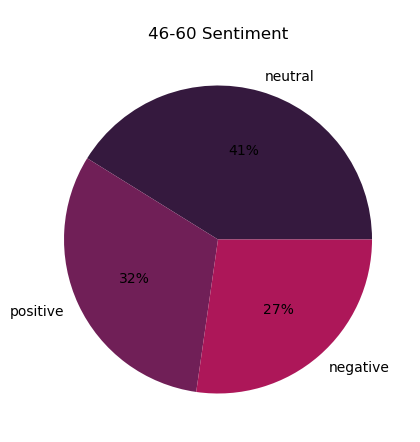

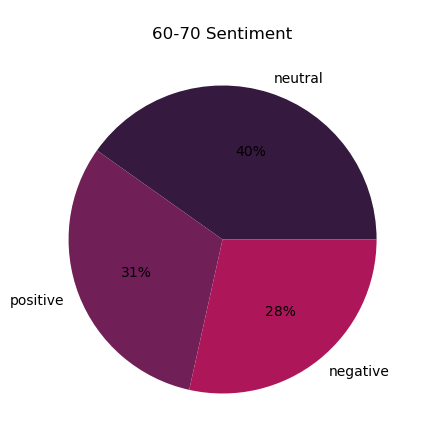

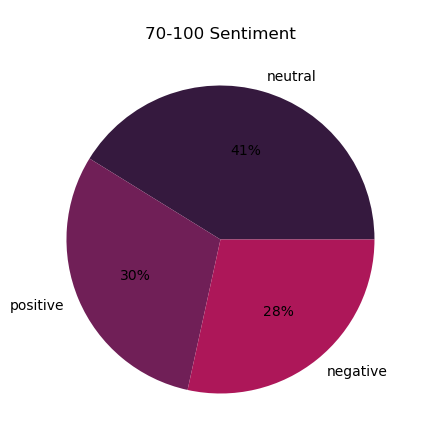

In [18]:
# relationship between sentiment of tweets based user age.
        
# filter data
a1 = data[data['Age'] == '0-20']
a2 = data[data['Age'] == '21-30']
a3 = data[data['Age'] == '31-45']
a4 = data[data['Age'] == '46-60']
a5 = data[data['Age'] == '60-70']
a6 = data[data['Age'] == '70-100']

# find emotion counts
a1_count = a1['Sentiment'].value_counts()
a2_count = a2['Sentiment'].value_counts()
a3_count = a3['Sentiment'].value_counts()
a4_count = a4['Sentiment'].value_counts()
a5_count = a5['Sentiment'].value_counts()
a6_count = a6['Sentiment'].value_counts()

# 0-20 chart
plt.figure(figsize = (5, 5))
plt.pie(a1_count, labels = a1_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n0-20 Sentiment')
plt.show()

# 21-30 chart
plt.figure(figsize = (5, 5))
plt.pie(a2_count, labels = a2_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n21-30 Sentiment')
plt.show()

# 31-45 chart
plt.figure(figsize = (5, 5))
plt.pie(a3_count, labels = a3_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n31-45 Sentiment')
plt.show()

# 46-60 chart
plt.figure(figsize = (5, 5))
plt.pie(a4_count, labels = a4_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n46-60 Sentiment')
plt.show()

# 60-70 chart
plt.figure(figsize = (5, 5))
plt.pie(a5_count, labels = a5_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n60-70 Sentiment')
plt.show()

# 70-100 chart
plt.figure(figsize = (5, 5))
plt.pie(a6_count, labels = a6_count.index, colors = palette, autopct='%.0f%%')
plt.title('\n70-100 Sentiment')
plt.show()


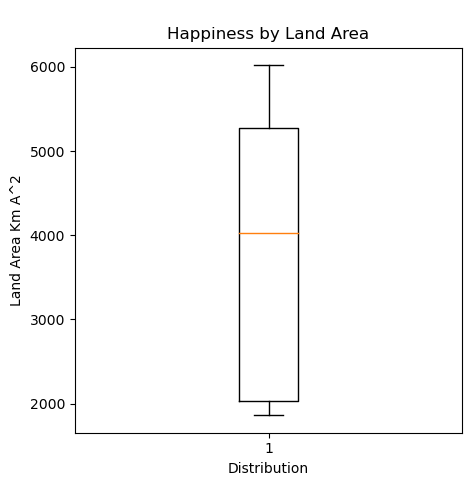

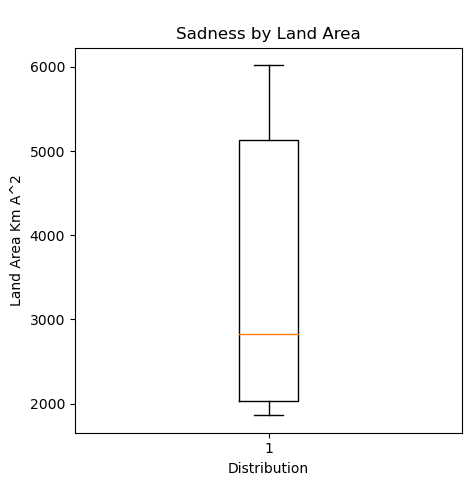

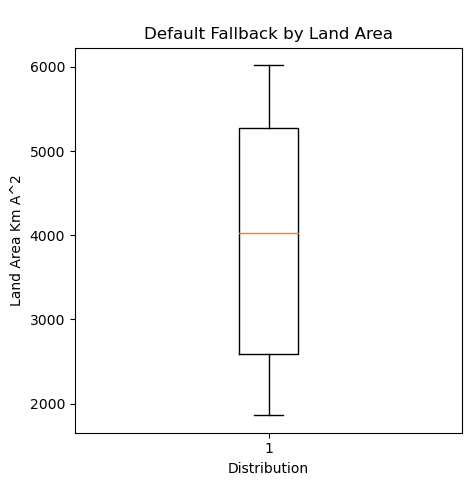

In [19]:
# relationship between emotion of tweets based on geographical land size

# remove outliers
clean = data.rename(columns={data.columns[7]: 'Land Area'})
clean = clean.drop(clean[clean['Land Area'] > 9000].index)
clean = clean.drop(clean[clean['Land Area'] < 1000].index)

# filter data
a1 = clean[clean['Predictions'] == "['happiness']"]
a2 = clean[clean['Predictions'] == "['sadness']"]
a3 = clean[clean['Predictions'] == "['df']"]

# happiness chart
plt.figure(figsize = (5, 5))
plt.boxplot(a1.iloc[:, 7], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Land Area Km A^2')
plt.title('\nHappiness by Land Area')
plt.show()

# sadness chart
plt.figure(figsize = (5, 5))
plt.boxplot(a2.iloc[:, 7], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Land Area Km A^2')
plt.title('\nSadness by Land Area')
plt.show()

# df chart
plt.figure(figsize = (5, 5))
plt.boxplot(a3.iloc[:, 7], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Land Area Km A^2')
plt.title('\nDefault Fallback by Land Area')
plt.show()

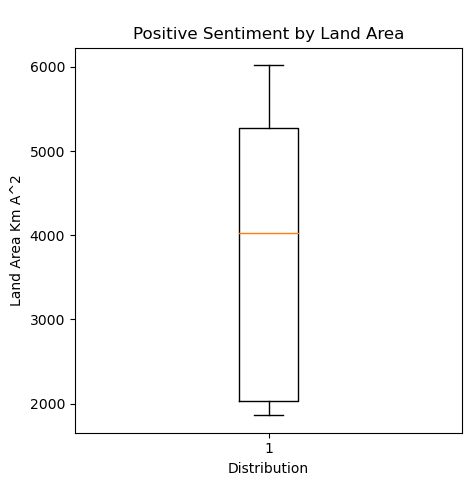

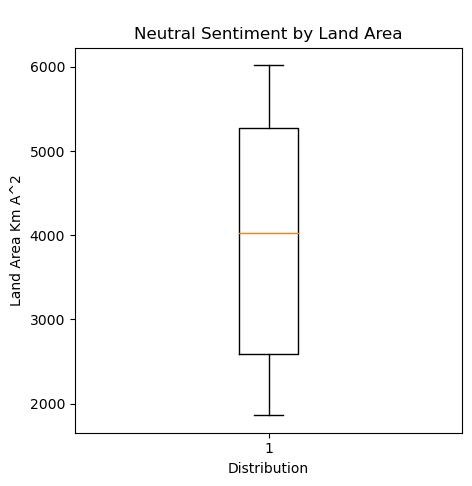

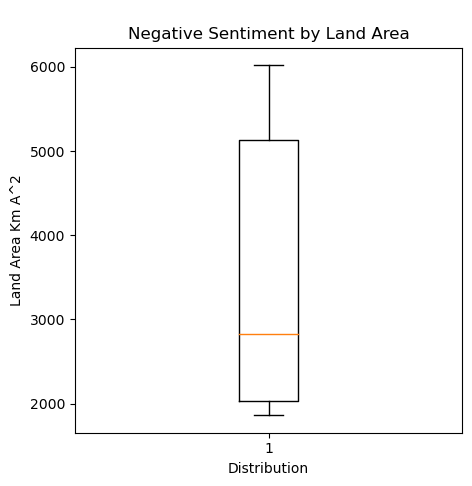

In [20]:
# relationship between sentiment of tweets based on geographical land size

# remove outliers
clean = data.rename(columns={data.columns[7]: 'Land Area'})
clean = clean.drop(clean[clean['Land Area'] > 9000].index)
clean = clean.drop(clean[clean['Land Area'] < 1000].index)

# filter data
a1 = clean[clean['Sentiment'] == "positive"]
a2 = clean[clean['Sentiment'] == "neutral"]
a3 = clean[clean['Sentiment'] == "negative"]

# happiness chart
plt.figure(figsize = (5, 5))
plt.boxplot(a1.iloc[:, 7], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Land Area Km A^2')
plt.title('\nPositive Sentiment by Land Area')
plt.show()

# sadness chart
plt.figure(figsize = (5, 5))
plt.boxplot(a2.iloc[:, 7], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Land Area Km A^2')
plt.title('\nNeutral Sentiment by Land Area')
plt.show()

# df chart
plt.figure(figsize = (5, 5))
plt.boxplot(a3.iloc[:, 7], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Land Area Km A^2')
plt.title('\nNegative Sentiment by Land Area')
plt.show()

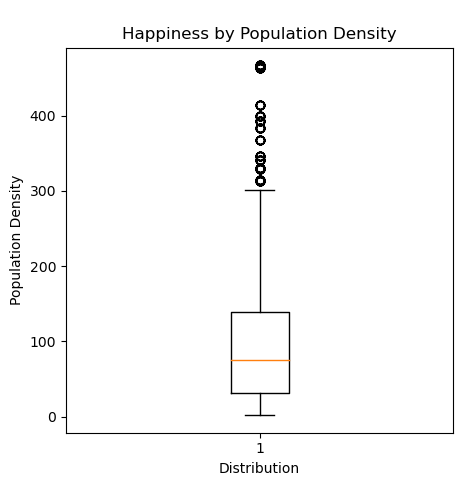

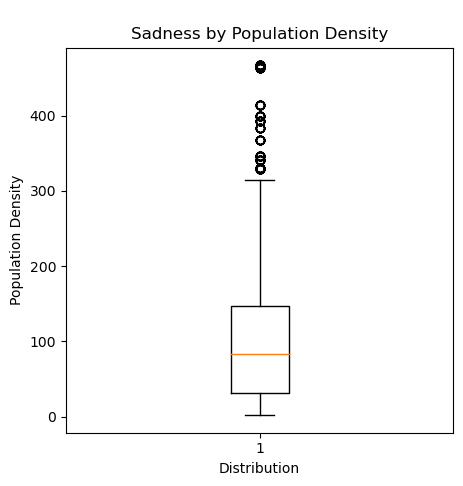

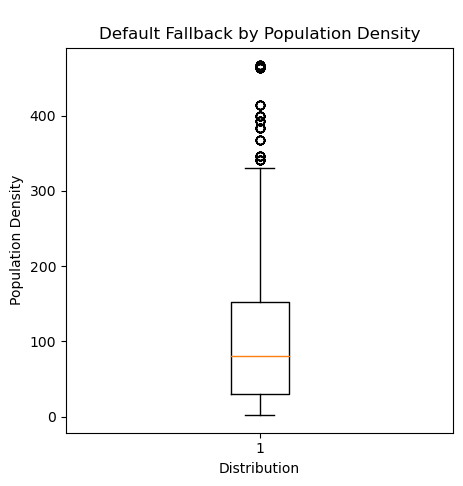

In [21]:
# relationship between emotion of tweets based on population density.

# remove outliers
clean = data.rename(columns={data.columns[8]: 'Density'})
clean = clean.drop(clean[clean['Density'] > 500].index)

# filter data
a1 = clean[clean['Predictions'] == "['happiness']"]
a2 = clean[clean['Predictions'] == "['sadness']"]
a3 = clean[clean['Predictions'] == "['df']"]

# happiness chart
plt.figure(figsize = (5, 5))
plt.boxplot(a1.iloc[:, 8], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Population Density')
plt.title('\nHappiness by Population Density')
plt.show()

# sadness chart
plt.figure(figsize = (5, 5))
plt.boxplot(a2.iloc[:, 8], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Population Density')
plt.title('\nSadness by Population Density')
plt.show()

# df chart
plt.figure(figsize = (5, 5))
plt.boxplot(a3.iloc[:, 8], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Population Density')
plt.title('\nDefault Fallback by Population Density')
plt.show()

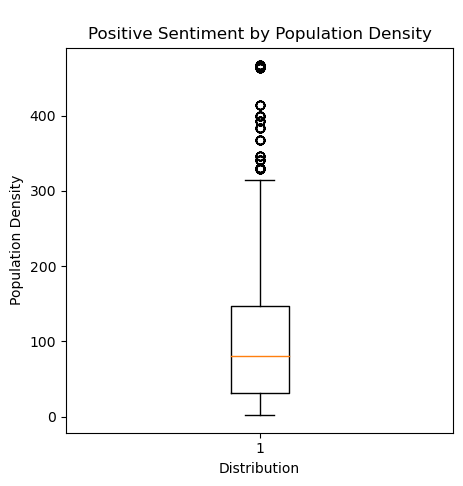

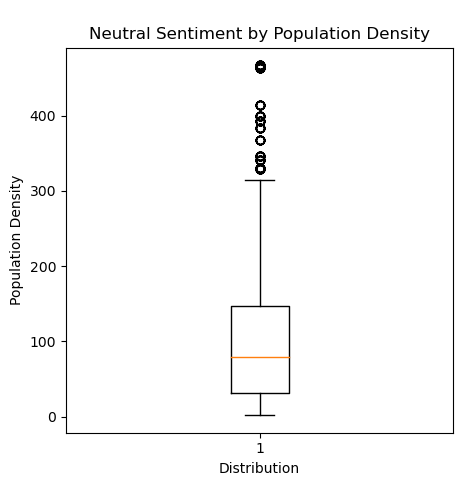

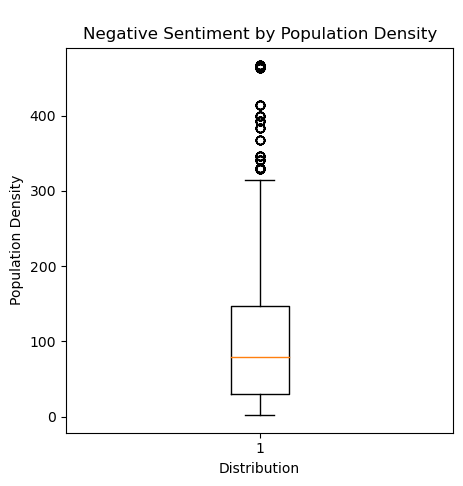

In [22]:
# relationship between sentiment of tweets based on population density.

# remove outliers
clean = data.rename(columns={data.columns[8]: 'Density'})
clean = clean.drop(clean[clean['Density'] > 500].index)

# filter data
a1 = clean[clean['Sentiment'] == "positive"]
a2 = clean[clean['Sentiment'] == "neutral"]
a3 = clean[clean['Sentiment'] == "negative"]

# happiness chart
plt.figure(figsize = (5, 5))
plt.boxplot(a1.iloc[:, 8], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Population Density')
plt.title('\nPositive Sentiment by Population Density')
plt.show()

# sadness chart
plt.figure(figsize = (5, 5))
plt.boxplot(a2.iloc[:, 8], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Population Density')
plt.title('\nNeutral Sentiment by Population Density')
plt.show()

# df chart
plt.figure(figsize = (5, 5))
plt.boxplot(a3.iloc[:, 8], autorange = True)
plt.xlabel('Distribution')
plt.ylabel('Population Density')
plt.title('\nNegative Sentiment by Population Density')
plt.show()